<a href="https://colab.research.google.com/github/dvtran63/ai-learning-notebooks/blob/main_b1/Day7_Titanic_Survival_Prediction_Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 🚢 Day 7: Titanic Survival Prediction - Mini Project

# 📌 Steps:
# 1. Load and explore data
# 2. Preprocess: clean, encode, and scale
# 3. Train models (Decision Tree, KNN)
# 4. Evaluate performance
# 5. Visualize results


## 📥 Load and Explore the Dataset

In [2]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# 🧹 Preprocessing

In [3]:
# Drop rows with missing values in selected columns
df = df.dropna(subset=["age", "embarked", "fare", "sex"])

# Encode categorical variables
df["sex"] = df["sex"].map({"male": 0, "female": 1})
df["embarked"] = df["embarked"].map({"S": 0, "C": 1, "Q": 2})

# Select features and target
features = ["pclass", "sex", "age", "fare", "embarked"]
X = df[features]
y = df["survived"]


# ⚙️ Train/Test Split and Scaling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 🌳 Train and Evaluate: Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tree))

#GridSearchCV
#tree = DecisionTreeClassifier(random_state=42)
param_grid_tree = {
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 4, 6]
}

grid_tree = GridSearchCV(tree, param_grid_tree, cv=5)
grid_tree.fit(X_train, y_train)

print("Best parameters (Decision Tree):", grid_tree.best_params_)
print("Best cross-val score:", grid_tree.best_score_)


Confusion Matrix:
[[60 20]
 [21 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.75      0.75        80
           1       0.68      0.67      0.67        63

    accuracy                           0.71       143
   macro avg       0.71      0.71      0.71       143
weighted avg       0.71      0.71      0.71       143

Best parameters (Decision Tree): {'max_depth': 6, 'min_samples_split': 4}
Best cross-val score: 0.792578792113026


# 🤖 Try Another Model: KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

#GridSearchCV tuning
#knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': range(1, 31)}

grid_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_knn.fit(X_train, y_train)

print("Best parameters (KNN):", grid_knn.best_params_)
print("Best cross-val score:", grid_knn.best_score_)


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82        80
           1       0.83      0.63      0.72        63

    accuracy                           0.78       143
   macro avg       0.80      0.77      0.77       143
weighted avg       0.79      0.78      0.78       143

Best parameters (KNN): {'n_neighbors': 4}
Best cross-val score: 0.8066915075298866


# 🔁 Cross-Validation

In [7]:
from sklearn.model_selection import cross_val_score

tree_cv = cross_val_score(tree, X, y, cv=5, scoring='accuracy')
knn_cv = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

print("Decision Tree CV Accuracy:", tree_cv.mean())
print("KNN CV Accuracy:", knn_cv.mean())


Decision Tree CV Accuracy: 0.789382448537378
KNN CV Accuracy: 0.6588003545750024


# 🌳 Visualize Decision Tree

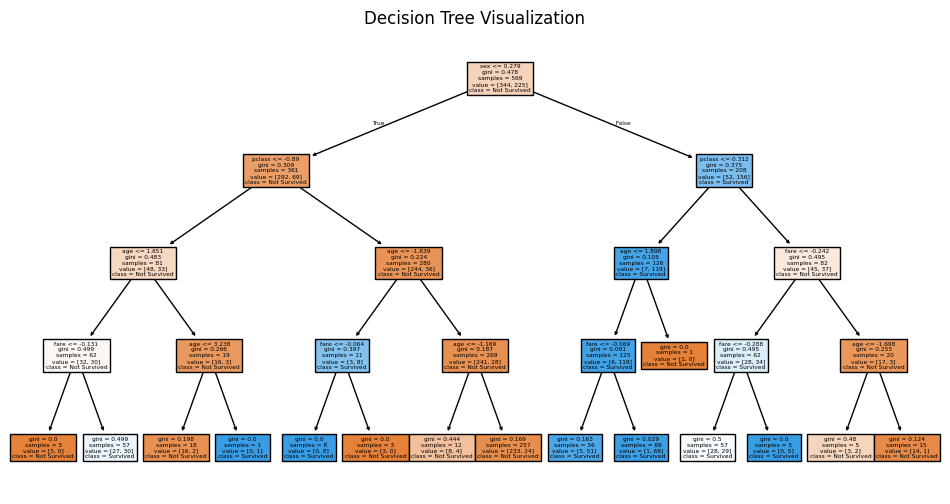

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plot_tree(tree, filled=True, feature_names=features, class_names=["Not Survived", "Survived"])
plt.title("Decision Tree Visualization")
plt.show()


# ✅ Bonus Challenge (Optional)

# Using Logistic Regression

In [19]:
# Try using Logistic Regression or GridSearchCV for tuning!

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

lr_cv = cross_val_score(lr, X, y, cv=5, scoring='accuracy')

print("Logistic Regression CV Accuracy:", lr_cv.mean())

#GridSearchCV tuning
param_grid_lr = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'] # Ensure solver compatibility with penalty
    }
grid_lr = GridSearchCV(lr, param_grid_lr)
grid_lr.fit(X_train, y_train)

print("Best parameters (KNN):", grid_lr.best_params_)
print("Best cross-val score:", grid_lr.best_score_)



Logistic Regression Confusion Matrix:
[[73  7]
 [23 40]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.91      0.83        80
           1       0.85      0.63      0.73        63

    accuracy                           0.79       143
   macro avg       0.81      0.77      0.78       143
weighted avg       0.80      0.79      0.78       143

Logistic Regression CV Accuracy: 0.7850783019797104
Best parameters (KNN): {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Best cross-val score: 0.7926253687315634
